In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
#Importing dataframe
processed_df = pd.read_csv('data/processed_data/co2_country_year.csv')

In [197]:
modern_pd = processed_df.loc[processed_df['Year'] == 2019]

In [198]:
modern_pd = modern_pd.groupby('COU').Total_MTCO2.max()

In [199]:
modern_pd.describe()

count      205.000000
mean       354.256833
std       2719.250215
min          0.007328
25%          1.952912
50%         11.232139
75%         65.756232
max      37082.558969
Name: Total_MTCO2, dtype: float64

<AxesSubplot: xlabel='Total_MTCO2', ylabel='Count'>

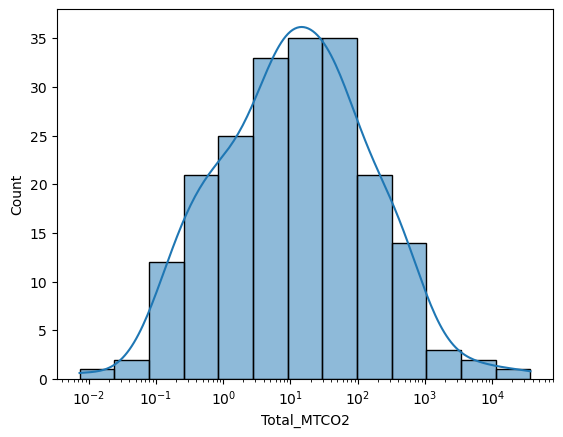

In [200]:
sns.histplot(data=modern_pd,log_scale=True, kde=True)

In [201]:
# removing massive outliers pt 1
Q1 = modern_pd.quantile(.25)
Q2 = modern_pd.quantile(.75)
IQR = Q2 - Q1

upper_bound = Q2 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [202]:
# removing massive outliers pt 2
modern_pd = modern_pd.loc[(modern_pd > lower_bound) & (modern_pd < upper_bound)]

In [203]:
modern_pd = modern_pd.loc[(modern_pd > (modern_pd.mean() - modern_pd.std()/2)) & (modern_pd < (modern_pd.mean() + modern_pd.std()/2))]
len(modern_pd)

57

In [204]:
processed_df = processed_df.loc[processed_df['COU'].isin(modern_pd.index)]
processed_df

,COU,Year,Country,Total_MTCO2,Coal,Oil,Gas,Cement,Flaring,Other,MTCO2_per_cap,GDP_per_cap,PrecievedHealth,PercentOfPopulation
9,AFG,2011,Afghanistan,11.838316,4.180624,7.335328,0.307776,0.014588,0.0,NaN,0.404740,621.912311,NaN,NaN
10,AFG,2012,Afghanistan,10.035314,3.125392,6.573216,0.307776,0.028930,0.0,NaN,0.329389,663.141053,NaN,NaN
11,AFG,2013,Afghanistan,9.250510,3.326912,5.591264,0.296784,0.035550,0.0,NaN,0.293283,651.987862,NaN,NaN
12,AFG,2014,Afghanistan,9.170309,3.705783,5.164638,0.271244,0.028644,0.0,NaN,0.280299,628.146804,NaN,NaN
13,AFG,2015,Afghanistan,9.791093,2.843264,6.624512,0.282128,0.041189,0.0,NaN,0.290076,592.476537,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,ZWE,2015,Zimbabwe,12.254954,8.060800,3.609040,0.000000,0.585114,0.0,NaN,0.865772,1410.329174,NaN,NaN
2484,ZWE,2016,Zimbabwe,10.533453,6.932288,3.140048,0.000000,0.461117,0.0,NaN,0.728822,1421.787789,NaN,NaN
2485,ZWE,2017,Zimbabwe,9.596071,5.900452,3.226752,0.000000,0.468867,0.0,NaN,0.650533,1192.107012,NaN,NaN
2486,ZWE,2018,Zimbabwe,11.795478,7.177776,4.059712,0.000000,0.557990,0.0,NaN,0.783639,2269.177012,NaN,NaN


Goals:

The goal of this project is to identify trends in carbon dioxide emissions for countries with an average GDP, excluding major players like the US and China. By combining carbon emissions data with economic statistics such as GDP, population, household income, and unemployment rates, we aim to identify correlations and trends that can shed light on how these countries can address their carbon output. Specifically, we want to explore how countries with average GDP can reduce their carbon emissions and move towards a more sustainable future.

By analyzing this dataset, we aim to gain insights into the relationship between carbon emissions and economic indicators and develop recommendations for addressing carbon emissions in countries with an average GDP.

Text(0, 0.5, 'GDP per Capita')

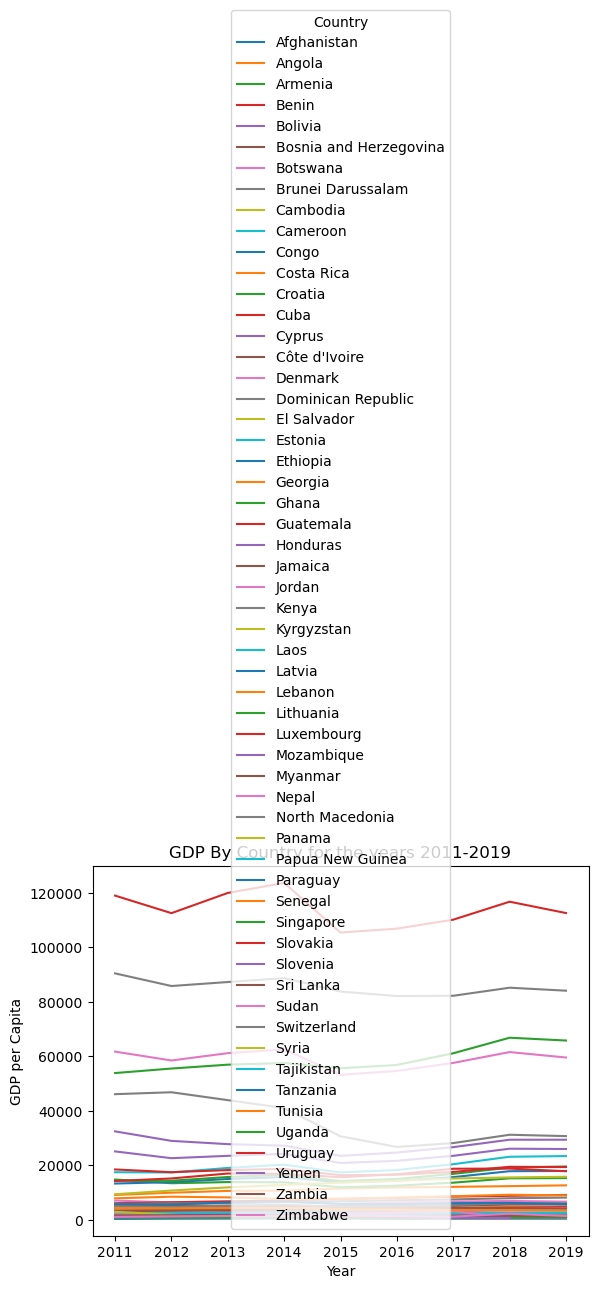

In [205]:
#Creating line plot for gdp by year for each country

gdp_plot = processed_df.pivot_table(index = 'Year', columns='Country', values='GDP_per_cap')
gdp_plot.plot(kind='line')
plt.title('GDP By Country for the years 2011-2019')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')

Text(0, 0.5, 'CO2 per Capita')

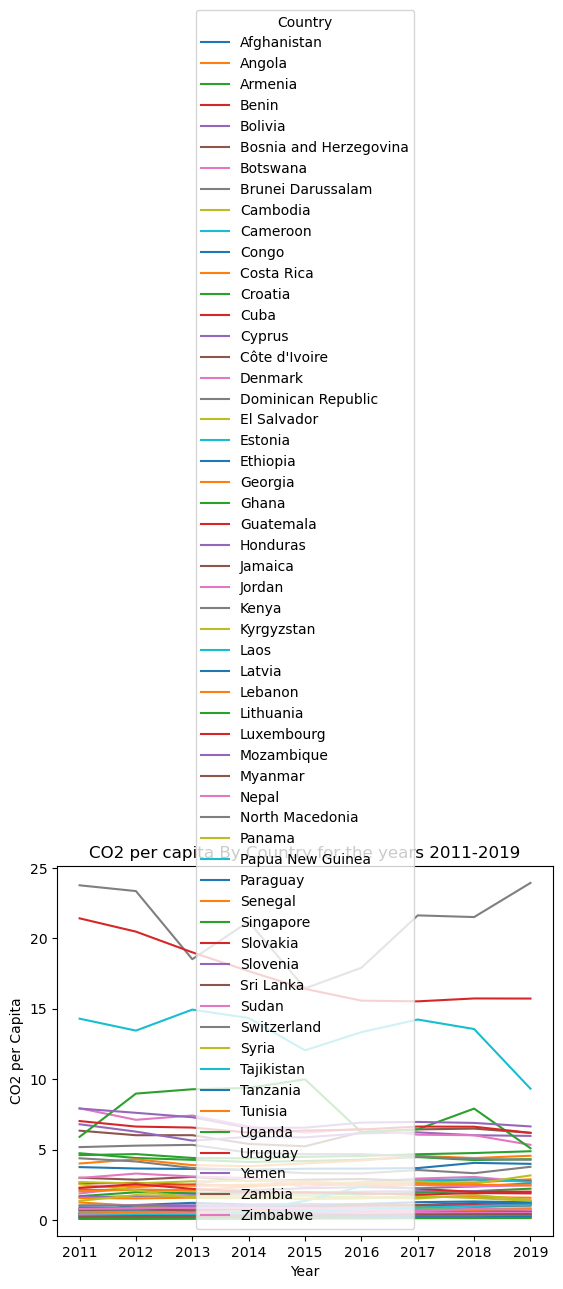

In [206]:
#Creating line plot for MTCO2 per cap by year for each country

co2_plot = processed_df.pivot_table(index = 'Year', columns='Country', values='MTCO2_per_cap')
co2_plot.plot(kind='line')
plt.title('CO2 per capita By Country for the years 2011-2019')
plt.xlabel('Year')
plt.ylabel('CO2 per Capita')